<a href="https://colab.research.google.com/github/SanjayK-46/House-Price-Prediction/blob/main/House_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# 📌 Step 2: Load the Dataset (Upload or mount to GDrive)
from google.colab import files
uploaded = files.upload()  # Upload 'House Price dataset.csv'

df = pd.read_csv("House Price dataset.csv")
df.head()


Saving House Price dataset.csv to House Price dataset.csv


,Record,Sale_amount,Sale_date,Beds,Baths,Sqft_home,Sqft_lot,Type,Build_year,Age,Town,University
0,1,295000,5/31/16,5,3.00,2020,38332.8,Single Family,1976,41,"Ames, IA",Iowa State University
1,2,240000,6/20/16,4,2.00,1498,54014.4,Single Family,2002,15,"Ames, IA",Iowa State University
2,3,385000,5/31/16,5,4.00,4000,85813.2,Single Family,2001,16,"Ames, IA",Iowa State University
3,4,268000,4/12/16,3,2.50,2283,118918.8,Single Family,1972,45,"Ames, IA",Iowa State University
4,5,186000,4/5/16,3,1.25,1527,15681.6,Single Family,1975,42,"Ames, IA",Iowa State University


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1qbbAwh7SypaC5W_fLrM0y1bbDPLmJpnUMPhP8WGEoF0/edit#gid=0


In [ ]:
# 📌 Step 3: Basic Info and Missing Values
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())


Shape: (10659, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10659 entries, 0 to 10658
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Record       10659 non-null  int64  
 1   Sale_amount  10659 non-null  int64  
 2   Sale_date    10659 non-null  object 
 3   Beds         10659 non-null  int64  
 4   Baths        10659 non-null  float64
 5   Sqft_home    10659 non-null  int64  
 6   Sqft_lot     10659 non-null  float64
 7   Type         10659 non-null  object 
 8   Build_year   10659 non-null  int64  
 9   Age          10659 non-null  int64  
 10  Town         10659 non-null  object 
 11  University   10659 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 999.4+ KB
None

Missing values:
Record         0
Sale_amount    0
Sale_date      0
Beds           0
Baths          0
Sqft_home      0
Sqft_lot       0
Type           0
Build_year     0
Age            0
Town           0
Univ

In [ ]:
# 📌 Step 4: Data Cleaning & Preprocessing

# Drop Record column (ID) if not needed
df.drop(columns=["Record"], inplace=True)

# Convert 'Sale_date' to datetime
df["Sale_date"] = pd.to_datetime(df["Sale_date"])

# Fill missing values (e.g., with median or mode)
df["Build_year"].fillna(df["Build_year"].median(), inplace=True)
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Beds"].fillna(df["Beds"].mode()[0], inplace=True)
df["Baths"].fillna(df["Baths"].mode()[0], inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=["Type", "Town", "University"], drop_first=True)

# Drop Sale_date if not needed
df.drop(columns=["Sale_date"], inplace=True)

df.head()


,Sale_amount,Beds,Baths,Sqft_home,Sqft_lot,Build_year,Age,Type_Multiple Occupancy,Type_Single Family,"Town_Amherst, MA",...,University_University of Northern Iowa,University_University of Oregon,University_University of Pittsburgh,University_University of Vermont,University_University of Virginia,University_University of Washington Tacoma,University_University of Wisconsin Madison,University_Utah State University,University_Virginia Tech,University_West Virginia University
0,295000,5,3.00,2020,38332.8,1976,41,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,240000,4,2.00,1498,54014.4,2002,15,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,385000,5,4.00,4000,85813.2,2001,16,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,268000,3,2.50,2283,118918.8,1972,45,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,186000,3,1.25,1527,15681.6,1975,42,False,True,False,...,False,False,False,False,False,False,False,False,False,False


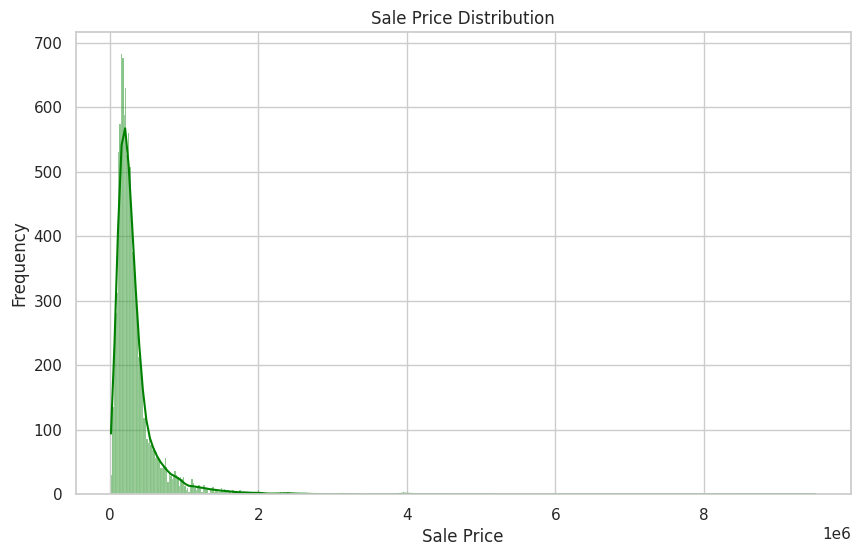

In [ ]:
# 📌 Step 5: EDA - Sale Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sale_amount'], kde=True, color='green')
plt.title("Sale Price Distribution")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()


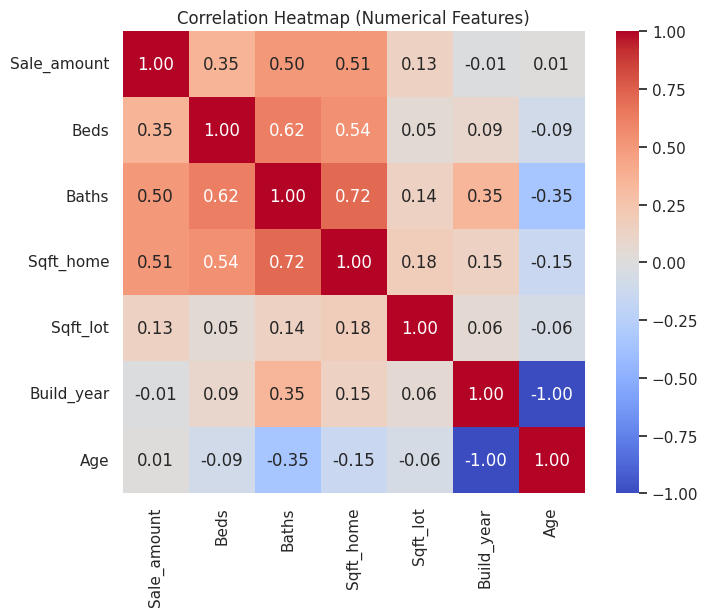

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns (exclude one-hot encoded towns and universities)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


In [ ]:
# 📌 Step 7: Feature & Target Selection
X = df.drop("Sale_amount", axis=1)
y = df["Sale_amount"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.dtypes)


Beds                                            int64
Baths                                         float64
Sqft_home                                       int64
Sqft_lot                                      float64
Build_year                                      int64
                                               ...   
University_University of Washington Tacoma       bool
University_University of Wisconsin Madison       bool
University_Utah State University                 bool
University_Virginia Tech                         bool
University_West Virginia University              bool
Length: 106, dtype: object


In [ ]:
df.drop(columns=['Sale_date', 'Record'], inplace=True, errors='ignore')


In [ ]:
X = df.drop('Sale_amount', axis=1)
y = df['Sale_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X = df.drop('Sale_amount', axis=1)
y = df['Sale_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Drop irrelevant columns
df.drop(columns=['Record', 'Sale_date'], inplace=True, errors='ignore')

# Encode categorical columns (Type, Town, University) using One-Hot Encoding
df = pd.get_dummies(df, columns=['Type', 'Town', 'University'], drop_first=True)

# Now split into features and target
X = df.drop('Sale_amount', axis=1)
y = df['Sale_amount']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "None of [Index(['Type', 'Town', 'University'], dtype='object')] are in the [columns]"

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
# 📌 Step 9: Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 76008564517.27
R² Score: 0.46


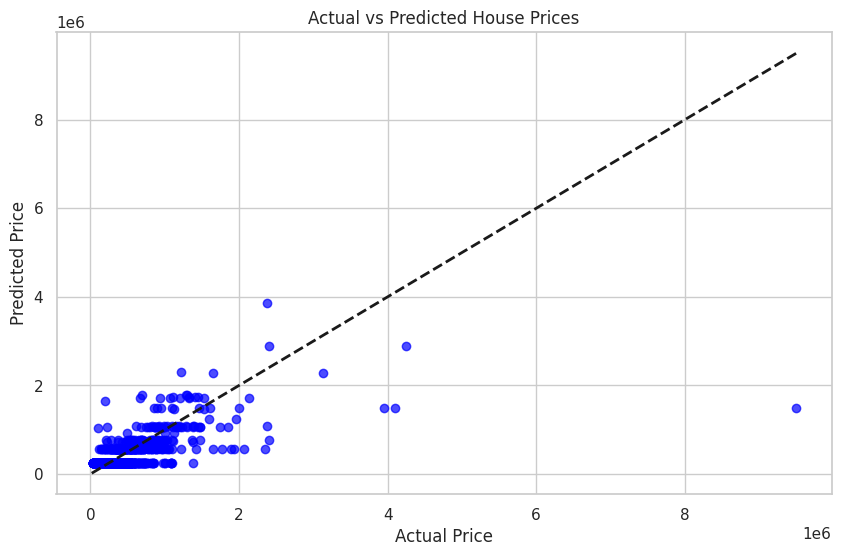

In [ ]:
# 📌 Step 10: Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [ ]:
!pip install plotly


In [ ]:
import plotly.express as px

fig = px.histogram(df, x="Sale_amount", nbins=50, title="Distribution of Sale Amount",
                   labels={"Sale_amount": "Sale Price"}, color_discrete_sequence=['indianred'])
fig.update_layout(bargap=0.1)
fig.show()


In [ ]:
import plotly.express as px

fig = px.scatter(df, x="Sqft_home", y="Sale_amount", color="Beds",
                 title="Sqft_home vs Sale Price by Number of Beds",
                 labels={"Sqft_home": "Living Area (sqft)", "Sale_amount": "Sale Price"})
fig.show()


In [ ]:
fig = px.histogram(df, x="Sale_amount", nbins=50,
                   title="Distribution of Sale Amount",
                   labels={"Sale_amount": "Sale Price"},
                   color_discrete_sequence=["darkcyan"])
fig.update_layout(bargap=0.1)
fig.show()


In [ ]:
fig = px.box(df, x="Baths", y="Sale_amount", color="Baths",
             title="Sale Price Distribution by Number of Bathrooms",
             labels={"Baths": "Bathrooms", "Sale_amount": "Sale Price"})
fig.show()


In [ ]:
# Extract all one-hot Town columns
town_columns = [col for col in df.columns if col.startswith("Town_")]

# Calculate average Sale_amount per town
town_avg_prices = {
    col.replace("Town_", ""): df[df[col] == 1]["Sale_amount"].mean()
    for col in town_columns
}

# Convert to DataFrame
import pandas as pd
town_avg_df = pd.DataFrame(town_avg_prices.items(), columns=["Town", "Average_Sale_Price"])

# Plot using Plotly
fig = px.bar(town_avg_df.sort_values("Average_Sale_Price", ascending=False),
             x="Town", y="Average_Sale_Price", title="Average Sale Price by Town",
             labels={"Average_Sale_Price": "Average Sale Price"},
             color="Average_Sale_Price", height=600)
fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [ ]:
# Run this cell to install required packages
!pip install scikit-learn pandas matplotlib seaborn --quiet


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset
df = pd.read_csv("House Price dataset.csv")

# Check and clean
df = df.dropna()

# Drop one-hot encoded text columns to simplify model input
df_model = df[['Sale_amount', 'Beds', 'Baths', 'Sqft_home', 'Sqft_lot', 'Build_year', 'Age']]

# Features and target
X = df_model.drop("Sale_amount", axis=1)
y = df_model["Sale_amount"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Load dataset
df = pd.read_csv("House Price dataset.csv")

# Check and clean
df = df.dropna()

# Drop one-hot encoded text columns to simplify model input
df_model = df[['Sale_amount', 'Beds', 'Baths', 'Sqft_home', 'Sqft_lot', 'Build_year', 'Age']]

# Features and target
X = df_model.drop("Sale_amount", axis=1)
y = df_model["Sale_amount"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: -0.009485979071386375
RMSE: 376235.83116228227


In [ ]:
def predict_price():
    print("\nEnter the following details to predict the House Price:")
    Beds = int(input("Number of Bedrooms: "))
    Baths = int(input("Number of Bathrooms: "))
    Sqft_home = int(input("Size of Home (in sqft): "))
    Sqft_lot = int(input("Size of Lot (in sqft): "))
    Build_year = int(input("Year Built: "))

    Age = 2025 - Build_year  # Calculate age based on current year

    input_data = pd.DataFrame([[Beds, Baths, Sqft_home, Sqft_lot, Build_year, Age]],
                              columns=['Beds', 'Baths', 'Sqft_home', 'Sqft_lot', 'Build_year', 'Age'])

    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    print(f"\n💰 Estimated Sale Price: ${prediction[0]:,.2f}")

# Call function
predict_price()



Enter the following details to predict the House Price:
Number of Bedrooms: 2
Number of Bathrooms: 2
Size of Home (in sqft): 2000
Size of Lot (in sqft): 2500
Year Built: 2020

💰 Estimated Sale Price: $735,000.00
